In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
np.random.seed(0)
warnings.filterwarnings('ignore')


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import ExtraTreesRegressor

In [2]:
df = pd.read_csv('../input/eergy-efficiency-dataset/ENB2012_data.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [4]:
df.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

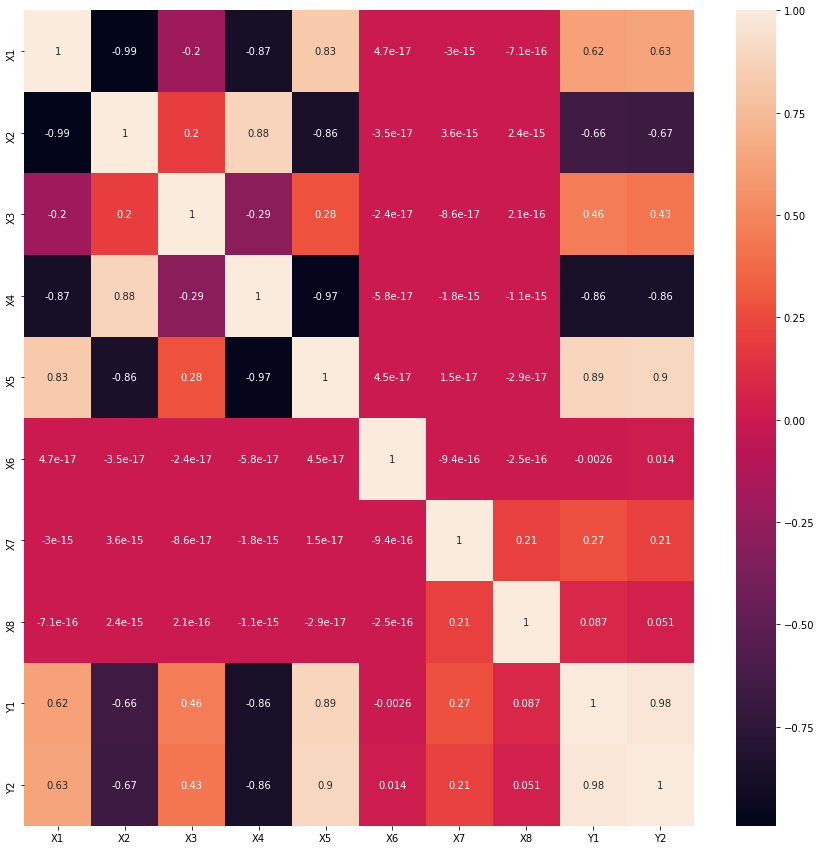

In [8]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True);

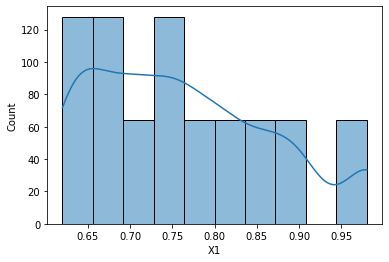

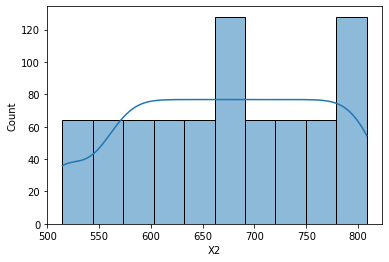

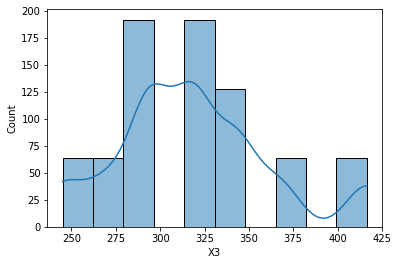

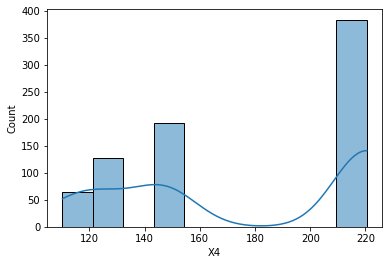

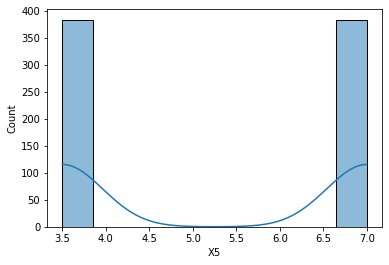

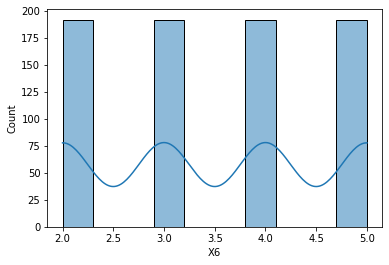

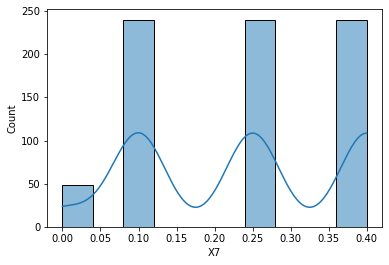

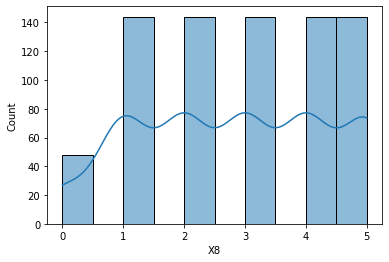

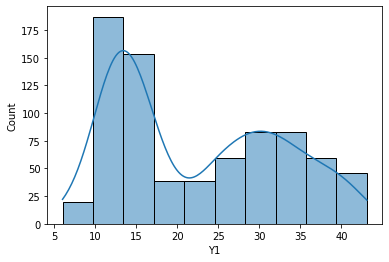

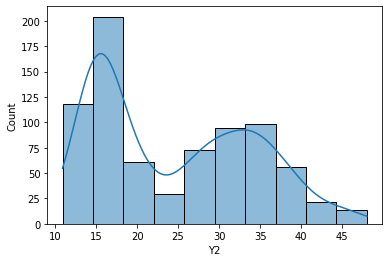

In [11]:
for i in df.columns:
    sns.histplot(df[i],bins =10,kde =True)
    plt.show()

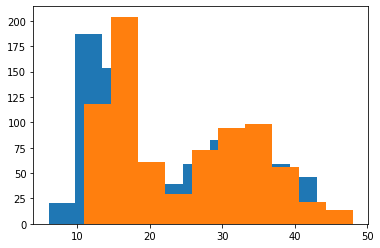

In [16]:
plt.hist(df["Y1"]);
plt.hist(df["Y2"]);

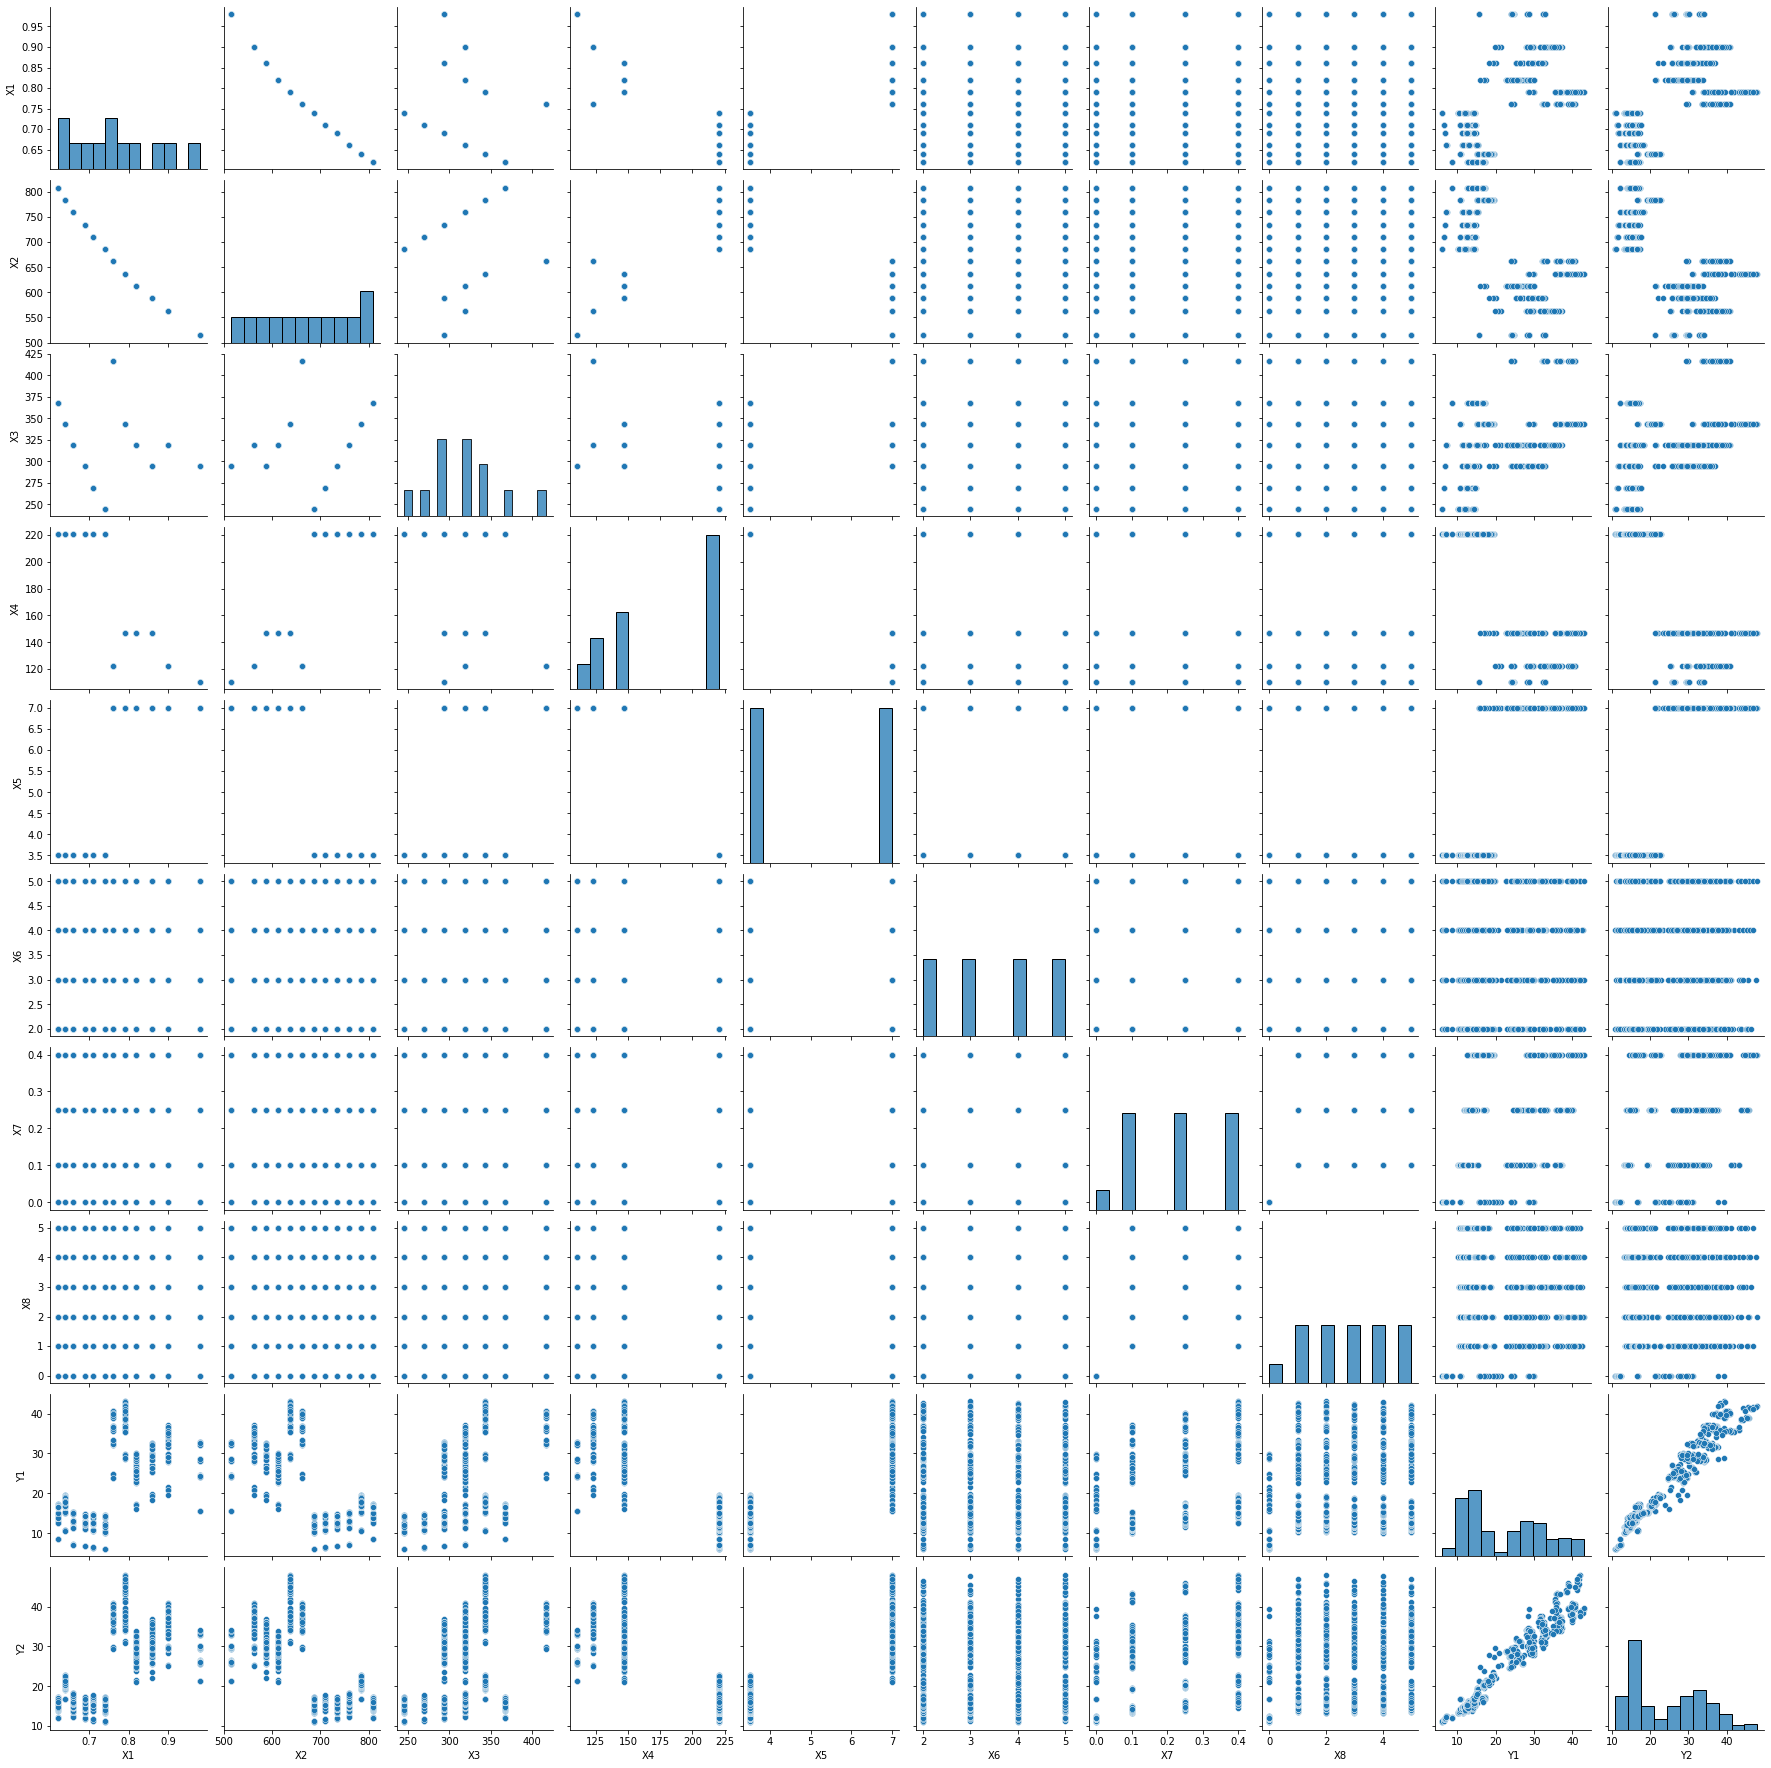

In [17]:
sns.pairplot(df);

In [19]:
X = df.drop(["Y1","Y2"],axis =1)
y1 = df["Y1"]
y2 = df["Y2"]

In [21]:
X_train,X_test,y1_train,y1_test = train_test_split(X,y1,test_size =0.2)
X_train,X_test,y2_train,y2_test = train_test_split(X,y2,test_size =0.2)

MSE :  218.3791307431169


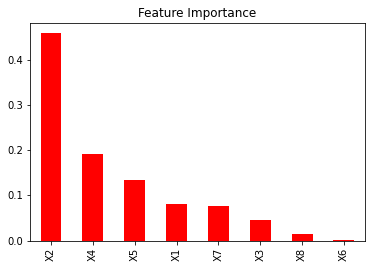

In [22]:
rf = RandomForestRegressor()
rf.fit(X,y1)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y1_test,y_pred)
print("MSE : ", mse)
coef = pd.Series(rf.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance" , color = 'red')
plt.show()

MSE :  0.3362018562337674


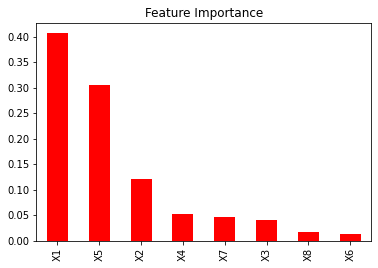

In [23]:
rf = RandomForestRegressor()
rf.fit(X,y2)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y2_test,y_pred)
print("MSE : ", mse)
coef = pd.Series(rf.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance" , color = 'red')
plt.show()

MSE :  218.38265406396107


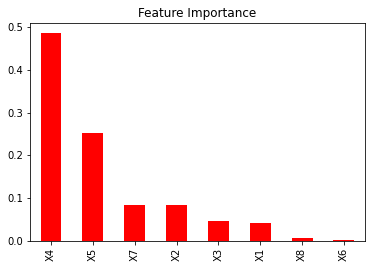

In [24]:
rf = ExtraTreesRegressor()
rf.fit(X,y1)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y1_test,y_pred)
print("MSE : ", mse)
coef = pd.Series(rf.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance" , color = 'red')
plt.show()

MSE :  1.5529700189223617e-27


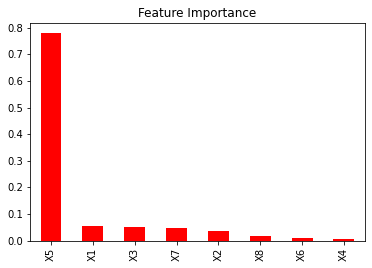

In [25]:
rf = ExtraTreesRegressor()
rf.fit(X,y2)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y2_test,y_pred)
print("MSE : ", mse)
coef = pd.Series(rf.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance" , color = 'red')
plt.show()